# Importing the Libraries

In [3]:
! pip install mlxtend

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set(color_codes=True)
from mlxtend.frequent_patterns import apriori, association_rules

# Loading dataset 

In [6]:
data = pd.read_excel('C:/Users/Rajinder/Online Retail.xlsx')

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory data analysis

In [8]:
data.shape

(541909, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [24]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (5231, 8)


In [25]:
data.count()

InvoiceNo      532621
StockCode      532621
Description    531166
Quantity       532621
InvoiceDate    532621
UnitPrice      532621
CustomerID     397924
Country        532621
dtype: int64

In [26]:
data = data.drop_duplicates()

In [28]:
data.count()

InvoiceNo      527390
StockCode      527390
Description    525935
Quantity       527390
InvoiceDate    527390
UnitPrice      527390
CustomerID     392732
Country        527390
dtype: int64

In [13]:
data.isnull().values.any()

True

In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.002925,-0.00621
UnitPrice,-0.002925,1.000000,-0.01079
CustomerID,-0.006210,-0.010790,1.00000


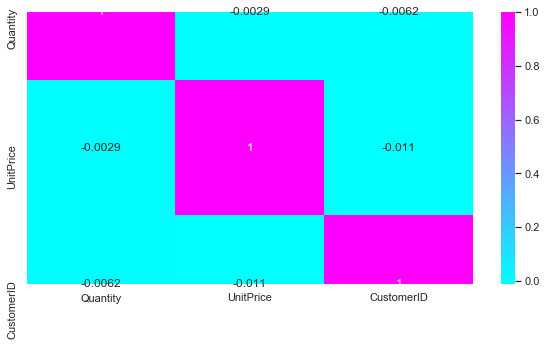

In [40]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap='cool', annot=True)
c

C:\Users\Rajinder\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rajinder\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


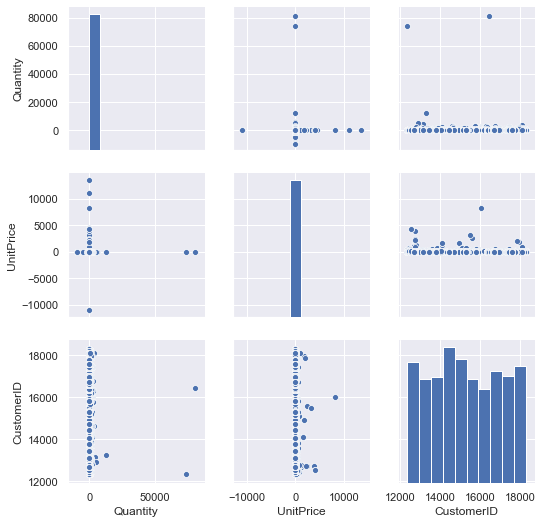

In [39]:
sns.pairplot(data)

# Data preprocessing

In [41]:
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0 , subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

In [42]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [43]:
basket_Italy = (data[data['Country'] == 'Italy']
               .groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0)
               .set_index('InvoiceNo'))

In [44]:
def hot_encode(x):
    if(x<=0):
        return 0
    if (x>=1):
        return 1

In [45]:
basket_encoded = basket_Italy.applymap(hot_encode)
basket_Italy = basket_encoded

In [46]:
basket_Italy.head()

Description,12 EGG HOUSE PAINTED WOOD,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,...,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP RED VINTAGE DOILY,YOU'RE CONFUSING ME METAL SIGN,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537022,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model building

In [47]:
frq_items = apriori(basket_Italy, min_support = 0.1, use_colnames = True)
rules = association_rules(frq_items, metric = 'lift', min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

In [48]:
print(rules.head())

                                          antecedents  \
30                               (LUNCH BAG WOODLAND)   
31                              (LUNCH BAG CARS BLUE)   
70  (SET OF 20 KIDS COOKIE CUTTERS, RETROSPOT TEA ...   
71                    (GINGERBREAD MAN COOKIE CUTTER)   
24                    (GINGERBREAD MAN COOKIE CUTTER)   

                                          consequents  antecedent support  \
30                              (LUNCH BAG CARS BLUE)            0.105263   
31                               (LUNCH BAG WOODLAND)            0.105263   
70                    (GINGERBREAD MAN COOKIE CUTTER)            0.105263   
71  (SET OF 20 KIDS COOKIE CUTTERS, RETROSPOT TEA ...            0.105263   
24                    (SET OF 20 KIDS COOKIE CUTTERS)            0.105263   

    consequent support   support  confidence  lift  leverage  conviction  
30            0.105263  0.105263         1.0   9.5  0.094183         inf  
31            0.105263  0.105263         1.0

# Conclusion

From the above output it is clear that lunch bag woodland and lunch bag cars blue are bought together, just like kids cookie cutter and gingerbread man cookie cutter are bought together as cookies in kids tiffin is a popular thing in Italy.

In [1]:
# Take Away
# Association rule is really helpful in finding relation between attributes and can be helpful in further pridicting the possiblities of purchase of one item with another. Factors like Support and confidence help in better analysis and are really useful